In [1]:
import numpy as np  # Importing the NumPy library for numerical computations
import pandas as pd  # Importing the Pandas library for data manipulation and analysis


In [2]:
# Setting Pandas options to display all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Importing the warnings module to suppress warnings
import warnings
# Filtering out all warnings to be ignored
warnings.filterwarnings('ignore')


In [3]:
# Reading the CSV file '10_01_train_dataset.csv' into a Pandas DataFrame
df = pd.read_csv('10_01_train_dataset.csv')

# Displaying the first few rows of the DataFrame to inspect the data
df.head()


,day_count_0_25,day_count_0_5,day_count_0_75,day_count_1_0,day_count_2_0,day_count_3_0,day_count_4_0,pop_count_0_25,pop_count_0_5,pop_count_0_75,pop_count_1_0,pop_count_2_0,pop_count_3_0,pop_count_4_0,burger_0_25,burger_0_5,burger_0_75,burger_1_0,burger_2_0,burger_3_0,burger_4_0,other_0_25,other_0_5,other_0_75,other_1_0,other_2_0,other_3_0,other_4_0,pizza_0_25,pizza_0_5,pizza_0_75,pizza_1_0,pizza_2_0,pizza_3_0,pizza_4_0,org_retail_visits_0_25,org_retail_visits_0_5,org_retail_visits_0_75,org_retail_visits_1_0,org_retail_visits_2_0,org_retail_visits_3_0,org_retail_visits_4_0,unorg_retail_visits_0_25,unorg_retail_visits_0_5,unorg_retail_visits_0_75,unorg_retail_visits_1_0,unorg_retail_visits_2_0,unorg_retail_visits_3_0,unorg_retail_visits_4_0,High_0_25,High_0_5,High_0_75,High_1_0,High_2_0,High_3_0,High_4_0,Medium_0_25,Medium_0_5,Medium_0_75,Medium_1_0,Medium_2_0,Medium_3_0,Medium_4_0,Low_0_25,Low_0_5,Low_0_75,Low_1_0,Low_2_0,Low_3_0,Low_4_0,density_lvl_0_25,density_lvl_0_5,density_lvl_0_75,density_lvl_1_0,density_lvl_2_0,density_lvl_3_0,density_lvl_4_0,road_cnt_0_25,road_cnt_0_5,road_cnt_0_75,road_cnt_1_0,road_cnt_2_0,road_cnt_3_0,road_cnt_4_0,coffee_shop_0_25,coffee_shop_0_5,coffee_shop_0_75,coffee_shop_1_0,coffee_shop_2_0,coffee_shop_3_0,coffee_shop_4_0,fast_food_restaurant_0_25,fast_food_restaurant_0_5,fast_food_restaurant_0_75,fast_food_restaurant_1_0,fast_food_restaurant_2_0,fast_food_restaurant_3_0,fast_food_restaurant_4_0,ice_cream_shop_0_25,ice_cream_shop_0_5,ice_cream_shop_0_75,ice_cream_shop_1_0,ice_cream_shop_2_0,ice_cream_shop_3_0,ice_cream_shop_4_0,pizza_restaurant_0_25,pizza_restaurant_0_5,pizza_restaurant_0_75,pizza_restaurant_1_0,pizza_restaurant_2_0,pizza_restaurant_3_0,pizza_restaurant_4_0,restaurant_0_25,restaurant_0_5,restaurant_0_75,restaurant_1_0,restaurant_2_0,restaurant_3_0,restaurant_4_0,size,concept_type,city,region,target
0,590,2022,3720,6944,24673,48211,64642,564,2006,3565,6783,24054,46564,62504,1,2,2,3,4,12,13,0,0,0,0,0,1,1,1,1,1,1,2,7,8,0,0,0,0,12964,12964,37642,0,512,4695,12182,71787,308270,308270,0,0,0,0,0,0,0,9,36,70,120,406,813,1190,0,0,0,0,0,0,0,3.722222,3.166667,2.957143,3.183333,2.922105,2.799091,2.617372,79,260,497,807,2798,5666,7985,0,0,0,0,0,1,2,0,0,0,1,2,7,7,1,1,1,1,2,3,3,1,1,1,1,2,6,7,1,2,3,3,6,8,8,286.8573,IL,riyadh,riyadh_region,4888254.998
1,427,1120,1949,3410,11167,20545,35977,250,907,1725,3025,10375,19684,34746,4,4,5,6,10,10,13,0,0,0,0,0,0,1,0,0,0,1,4,4,5,307762,435082,435082,438899,500172,549748,580722,1105,4420,8421,32960,169415,301057,434087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.950000,2.472973,2.119048,2.214765,2.019348,1.975992,1.908105,35,118,219,369,1327,2511,4168,0,0,1,1,5,5,7,1,1,1,2,5,5,5,0,0,0,0,0,2,3,1,1,1,2,6,7,8,3,3,3,3,7,9,12,72.3200,FC,other,ḥail_province,2862160.623
2,532,2710,5176,10186,36727,68759,116027,539,2662,5099,10253,36994,69292,116550,0,0,1,2,9,10,26,0,0,0,0,0,0,1,1,1,4,4,5,5,8,0,0,0,0,0,27072,1717994,3172,3172,8234,28058,182025,384826,689711,0,0,0,0,0,0,3,2,16,36,70,291,581,883,6,22,42,75,275,700,1383,3.777778,3.576923,3.463415,3.360000,3.264605,3.193793,3.020382,103,291,630,1080,3691,7754,13846,1,1,2,2,2,4,5,0,0,0,0,2,2,12,0,0,1,1,4,4,8,2,2,4,4,6,6,11,1,1,2,2,8,11,18,196.9590,ILDT,dammam,eastern_province,4033007.517
3,682,2464,4089,7273,26611,42798,59421,682,2507,4093,7072,26192,41967,58323,0,0,0,0,4,14,14,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,632520,927748,18282,18282,25874,25874,101899,315596,479070,0,0,0,0,29,133,324,0,0,0,11,197,417,594,10,35,83,127,282,439,679,2.100000,2.228571,2.178571,2.269231,2.285336,2.210261,2.018275,85,274,536,915,3250,5526,8181,0,0,0,0,0,0,1,0,0,0,0,3,6,6,0,0,0,0,2,3,6,0,0,0,0,2,4,6,0,0,0,1,3,13,14,129.5000,ILDT,other,eastern_province,3683833.046
4,754,2155,4225,6657,25903,56247,109079,798,2225,4436,6958,26105,55766,109197,1,3,4,5,12,30,47,0,0,0,0,1,3,5,0,0,1,2,4,4,7,0,0,705,1410,152210,1737477,3616601,29578,63144,91884,120941,277981,500471,1047923,9,37,82,145,566,1191,1718,0,0,0,0,0,32,231,0,0,0,0,0,0,0,4.277778,3.98648

### 1. EDA 

In [11]:
def sum_columns_starting_with(data_frame, name, new_column_name):
    """
    Function to sum columns in a DataFrame that start with a specified prefix.
    
    Parameters:
        data_frame (DataFrame): The input DataFrame.
        prefix (str): The prefix to search for in column names.
        new_column_name (str): The name of the new column that stores the sum.
    
    Returns:
        DataFrame: A DataFrame containing the sum of columns starting with the specified prefix.
    """
    # Create an empty DataFrame to store the result
    temp_df = pd.DataFrame()
    
    # Select columns that start with the specified prefix
    selected_columns = [col for col in data_frame.columns if col.startswith(name)]
    
    # Sum the selected columns along the rows (axis=1) and store the result in a new column
    temp_df[new_column_name] = data_frame[selected_columns].sum(axis=1)
    
    return temp_df


In [9]:
new_df = pd.DataFrame()

In [12]:
# concat one by one column with the name

new_df = pd.concat([new_df,sum_columns_starting_with(df, 'day_count_', 'day_count_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'pop_count_', 'pop_count_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'burger_', 'burger_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'other_', 'other_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'pizza_', 'pizza_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'org_retail_visits_', 'org_retail_visits_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'unorg_retail_visits_', 'unorg_retail_visits_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'High_', 'High_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'Low_', 'Low_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'Medium_', 'Medium_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'density_lvl_', 'density_lvl_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'road_cnt_', 'road_cnt_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'coffee_shop_', 'coffee_shop_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'fast_food_restaurant_', 'fast_food_restaurant_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'ice_cream_shop_', 'ice_cream_shop_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'pizza_restaurant_', 'pizza_restaurant_sum') ],axis = 1)
new_df = pd.concat([new_df,sum_columns_starting_with(df, 'restaurant_', 'restaurant_sum') ],axis = 1)


In [13]:
new_df = pd.concat([new_df, df[['size','concept_type','city','region','target']]],axis = 1)

In [17]:
new_df.sample(5)

,day_count_sum,pop_count_sum,burger_sum,other_sum,pizza_sum,org_retail_visits_sum,unorg_retail_visits_sum,High_sum,Low_sum,Medium_sum,density_lvl_sum,road_cnt_sum,coffee_shop_sum,fast_food_restaurant_sum,ice_cream_shop_sum,restaurant_sum,pizza_restaurant_sum,size,concept_type,city,region,target
20,52195,52555,14,0,9,443175,541169,0,1207,1409,12.275642,6612,15,9,9,6,18,380.245,FSDT,other,medina_province,4390028.086
24,324333,345576,48,5,12,8607301,3001911,11,2017,1567,23.348173,22104,7,35,23,23,21,59.334,FC,makkah,makkah_region,4472748.799
109,448009,473415,56,3,3,2050380,5704860,1002,1616,1561,27.895663,47755,3,49,13,25,8,127.200,IL,other,medina_province,6284314.921
57,41378,41242,45,6,14,153082,0,2835,0,128,18.666259,12317,2,29,7,23,12,327.000,FSDT,jeddah,makkah_region,7464101.684
61,5227,4798,0,0,7,0,0,0,0,0,5.253473,259,0,0,5,0,7,141.100,IL,other,makkah_region,2133613.803


In [18]:
new_df.shape

(116, 22)

In [19]:
import seaborn as sns  # Importing the Seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Importing the Matplotlib library for creating plots and visualizations


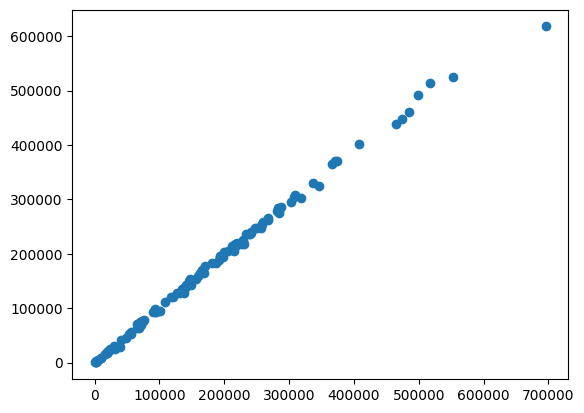

In [20]:
plt.scatter(new_df['pop_count_sum'], new_df['day_count_sum'])  # Creating a scatter plot with 'pop_count_sum' on the x-axis and 'day_count_sum' on the y-axis


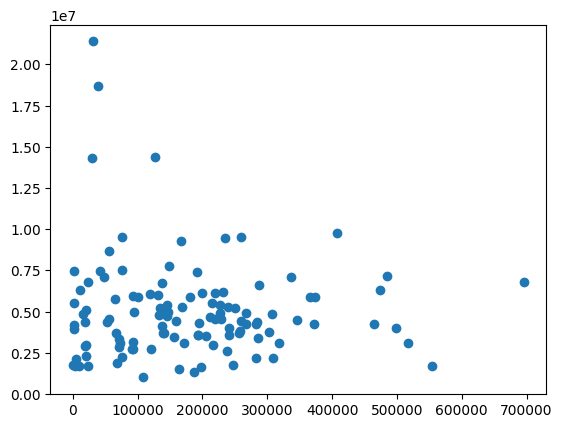

In [22]:
plt.scatter(new_df['pop_count_sum'], new_df['target'])  # Creating a scatter plot with 'pop_count_sum' on the x-axis and 'target' on the y-axis


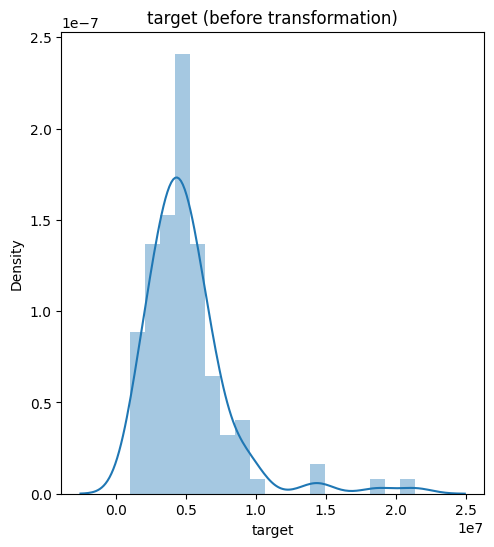

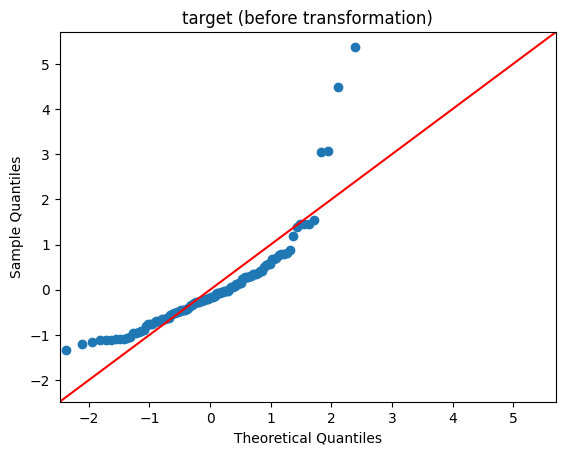

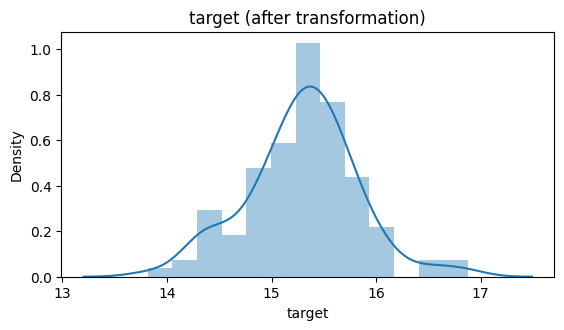

<Figure size 1400x1100 with 0 Axes>

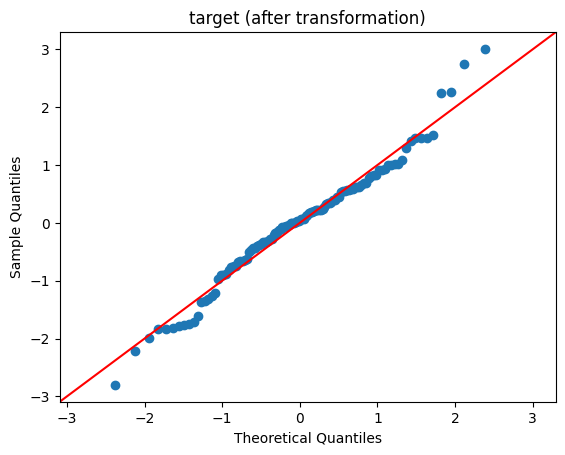

In [24]:
# Importing necessary libraries
import statsmodels.api as sm

# Applying log transformation to the target variable
target_trs = np.log1p(new_df['target'])

# Plotting the distribution of the target variable before transformation
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(new_df['target'])
plt.title('target (before transformation)')

# Creating a Q-Q plot for the target variable before transformation
sm.qqplot(new_df['target'], line='45', fit=True)
plt.title('target (before transformation)')

plt.show()

# Plotting the distribution of the target variable after transformation
plt.figure(figsize=(14, 7))
plt.subplot(221)
sns.distplot(target_trs)
plt.title('target (after transformation)')

# Creating a Q-Q plot for the target variable after transformation
plt.figure(figsize=(14, 11))
sm.qqplot(target_trs, line='45', fit=True)
plt.title('target (after transformation)')

plt.show()


In [25]:
# Updating the log transformed value
new_df['target'] = np.log1p(new_df['target'])

# Calculating the correlation of each column with the transformed target variable
target_correlation = new_df.corr()['target'].sort_values(ascending=False)


target                      1.000000
size                        0.338420
High_sum                    0.166047
other_sum                   0.089548
coffee_shop_sum             0.088259
burger_sum                  0.059737
density_lvl_sum             0.048627
org_retail_visits_sum       0.042211
unorg_retail_visits_sum     0.037037
pop_count_sum               0.024048
restaurant_sum              0.024024
pizza_sum                   0.021154
day_count_sum               0.016702
pizza_restaurant_sum        0.013894
fast_food_restaurant_sum    0.010214
ice_cream_shop_sum          0.006419
road_cnt_sum                0.005131
Medium_sum                 -0.001132
Low_sum                    -0.069421
Name: target, dtype: float64

<AxesSubplot: >

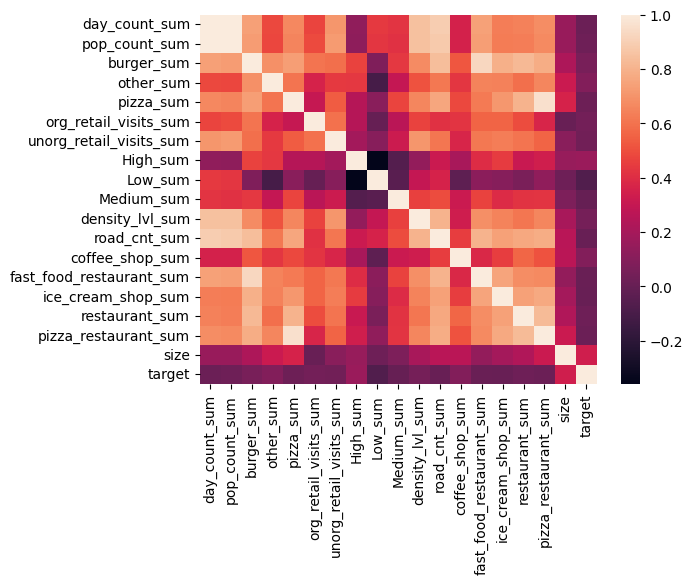

In [28]:
# Creating a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(new_df.corr())

### 2. Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(mlp, X, y, cv = kfold, scoring = 'r2')

scores.mean()

In [29]:
# import all the required models 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


In [30]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = new_df.copy()

categorical_cols = new_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['FC', 'FSDT', 'IL', 'ILDT'], dtype=object)]
[array(['dammam', 'jeddah', 'khobar', 'madina', 'makkah', 'other',
       'riyadh'], dtype=object)]
[array(['al-qassim_province', 'asir_province', 'eastern_province',
       'jazan_province', 'makkah_region', 'medina_province',
       'riyadh_region', 'tabuk_province', 'ḥail_province'], dtype=object)]


In [31]:
data_label_encoded.drop(columns = ['target'],inplace = True) # droping the target column

In [33]:
X = data_label_encoded.copy()
y = np.log1p(df['target'])

In [34]:
#recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Creating an estimator (in this case, ExtraTreesRegressor) for feature selection
estimator = ExtraTreesRegressor()

# Initializing RFE (Recursive Feature Elimination) with the estimator and number of features to select
selector_label = RFE(estimator, n_features_to_select=data_label_encoded.shape[1], step=1)

# Fitting RFE to the data
selector_label = selector_label.fit(data_label_encoded, y)

# Selecting the features that were chosen by RFE
selected_features = data_label_encoded.columns[selector_label.support_]

# Retrieving the feature importances from the estimator
selected_coefficients = selector_label.estimator_.feature_importances_

# Creating a DataFrame to store selected features and their corresponding RFE scores
fi_df1 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score_et': selected_coefficients
}).sort_values(by='rfe_score_et', ascending=False)

fi_df1


,feature,rfe_score_et
17,size,0.209277
18,concept_type,0.114458
7,High_sum,0.062395
10,density_lvl_sum,0.054614
20,region,0.052115
3,other_sum,0.051086
1,pop_count_sum,0.041027
11,road_cnt_sum,0.040413
0,day_count_sum,0.035763
16,pizza_restaurant_sum,0.033348


In [36]:
# Doing RFE for 2nd time 
# Creating an estimator (GradientBoostingRegressor) for feature selection
estimator = GradientBoostingRegressor()

# Initializing RFE (Recursive Feature Elimination) with the estimator and number of features to select
selector_label = RFE(estimator, n_features_to_select=data_label_encoded.shape[1], step=1)

# Fitting RFE to the data
selector_label = selector_label.fit(data_label_encoded, y)

# Selecting the features that were chosen by RFE
selected_features = data_label_encoded.columns[selector_label.support_]

# Retrieving the feature importances from the estimator
selected_coefficients = selector_label.estimator_.feature_importances_

# Creating a DataFrame to store selected features and their corresponding RFE scores
fi_df2 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score_gb': selected_coefficients
}).sort_values(by='rfe_score_gb', ascending=False)

fi_df2


,feature,rfe_score_gb
17,size,0.332006
18,concept_type,0.081801
7,High_sum,0.078529
10,density_lvl_sum,0.076766
5,org_retail_visits_sum,0.076051
1,pop_count_sum,0.049053
9,Medium_sum,0.045031
3,other_sum,0.040016
0,day_count_sum,0.038759
11,road_cnt_sum,0.033621


In [37]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(data_label_encoded, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regressor with 100 estimators
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the Random Forest model to the training data
rf_label.fit(X_train_label, y_train_label)

# Calculating permutation importance for each feature
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Creating a DataFrame to store features and their permutation importances
fi_df3 = pd.DataFrame({
    'feature': data_label_encoded.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df3


,feature,permutation_importance
17,size,0.764127
18,concept_type,0.114290
10,density_lvl_sum,0.024217
9,Medium_sum,0.012861
13,fast_food_restaurant_sum,0.009296
20,region,0.007848
3,other_sum,0.006910
7,High_sum,0.005862
15,restaurant_sum,0.003338
1,pop_count_sum,0.000675


In [38]:
# Merging feature importance DataFrames fi_df1, fi_df2, and fi_df3 on the 'feature' column
final_fi_df = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature')

# Setting the 'feature' column as the index
final_fi_df = final_fi_df.set_index('feature')

final_fi_df


,rfe_score_et,rfe_score_gb,permutation_importance
feature,,,
size,0.209277,0.332006,0.764127
concept_type,0.114458,0.081801,0.114290
High_sum,0.062395,0.078529,0.005862
density_lvl_sum,0.054614,0.076766,0.024217
region,0.052115,0.008031,0.007848
other_sum,0.051086,0.040016,0.006910
pop_count_sum,0.041027,0.049053,0.000675
road_cnt_sum,0.040413,0.033621,-0.022876
day_count_sum,0.035763,0.038759,-0.000973


In [39]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,rfe_score_et,rfe_score_gb,permutation_importance
feature,,,
size,0.209277,0.332006,0.902038
concept_type,0.114458,0.081801,0.134917
High_sum,0.062395,0.078529,0.006920
density_lvl_sum,0.054614,0.076766,0.028587
region,0.052115,0.008031,0.009264
other_sum,0.051086,0.040016,0.008157
pop_count_sum,0.041027,0.049053,0.000797
road_cnt_sum,0.040413,0.033621,-0.027005
day_count_sum,0.035763,0.038759,-0.001149


In [40]:
# Calculating the mean of feature importance scores across different methods
final_ft = final_fi_df[['rfe_score_et', 'rfe_score_gb', 'permutation_importance']].mean(axis=1)

# Sorting the features by mean importance score in descending order
final_ft = final_ft.sort_values(ascending=False)

final_ft


feature
size                        0.481107
concept_type                0.110392
density_lvl_sum             0.053323
High_sum                    0.049281
org_retail_visits_sum       0.034568
other_sum                   0.033086
Medium_sum                  0.030533
pop_count_sum               0.030292
day_count_sum               0.024458
region                      0.023137
fast_food_restaurant_sum    0.018293
Low_sum                     0.018284
pizza_sum                   0.017937
road_cnt_sum                0.015676
restaurant_sum              0.012924
pizza_restaurant_sum        0.011761
ice_cream_shop_sum          0.008068
coffee_shop_sum             0.007569
burger_sum                  0.007462
city                        0.007433
unorg_retail_visits_sum     0.004415
dtype: float64

In [41]:
# Selecting the top 10 features based on their mean importance scores
final_col = final_ft[:10].index

final_col


Index(['size', 'concept_type', 'density_lvl_sum', 'High_sum',
       'org_retail_visits_sum', 'other_sum', 'Medium_sum', 'pop_count_sum',
       'day_count_sum', 'region'],
      dtype='object', name='feature')

In [42]:
final_df = data_label_encoded[final_col]

### 3. Model Selection

In [43]:
# creating the object of the models
svr = SVR()
rd = Ridge()  
ls = Lasso()
dt = DecisionTreeRegressor()
rf =RandomForestRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
ab = AdaBoostRegressor()
mlp = MLPRegressor()
xgboost = XGBRegressor()
lr = LinearRegression()

In [44]:
# Importing the PowerTransformer class from the preprocessing module of scikit-learn
from sklearn.preprocessing import PowerTransformer

# Instantiating a PowerTransformer object
pt1 = PowerTransformer()

# Transforming the final dataframe 'final_df' using the PowerTransformer object
# and simultaneously fitting the transformer to the data
X_transformed_final = pt1.fit_transform(final_df)


In [45]:
# train tets and split
X_train,X_test,y_train,y_test = train_test_split(final_df,y,test_size = 0.2, random_state = 42)
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)



In [50]:
np.mean(cross_val_score(gb,X_transformed_final,y,scoring='r2'))

0.2338058330126583

In [51]:
#after power transform
# Function to evaluate a model's performance after power transformation
def scorer(model_name, model):
    """
    Evaluate a model's performance using cross-validation and test set evaluation.

    Args:
    - model_name (str): Name of the model.
    - model: The model object to be evaluated.

    Returns:
    - output (list): List containing the model name, mean cross-validation R-squared score, and mean absolute error on the test set.
    """

    # Initialize an empty list to store the output values
    output = []

    # Append the model name to the output list
    output.append(model_name)

    # Cross-validation
    # Initialize a KFold object with 10 splits, shuffling the data and setting the random state
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    # Perform cross-validation, computing R-squared scores
    scores = cross_val_score(model, X_transformed_final, y, cv=kfold, scoring='r2')
    # Calculate the mean of the cross-validation scores and append it to the output list
    output.append(scores.mean())

    # Train-Test Split
    # Split the transformed data and the target variable into training and testing sets, using 80% of the data for training
    X_train, X_test, y_train, y_test = train_test_split(X_transformed_final, y, test_size=0.2, random_state=42)
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Prediction and Evaluation
    # Predict the target variable using the model and the test data
    y_pred = model.predict(X_test)
    # Calculate the mean absolute error (MAE) between the predicted and actual target values
    # Reverse the power transformation on the target variable using np.expm1
    # Round the MAE to two decimal places and append it to the output list
    output.append(round(mean_absolute_error(np.expm1(y_test), y_pred), 2))

    # Return the output list containing the model name, mean cross-validation R-squared score, and mean absolute error on the test set
    return output


In [52]:
# Creating a dictonary of models
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'xgboost':XGBRegressor()
}

In [53]:
model_output = []

# Iterate over the items (model_name, model) in the model_dict dictionary
for model_name, model in model_dict.items():
    # Call the scorer function to evaluate the model and append the result to the model_output list
    model_output.append(scorer(model_name, model))

In [54]:
model_output

[['linear_reg', -0.006083925303841653, 5004288.99],
 ['svr', 0.058554175542492495, 5004289.02],
 ['ridge', -0.09298393771357938, 5004288.97],
 ['LASSO', -0.12621773720047774, 5004288.99],
 ['decision tree', -0.19180429508028576, 5004289.0],
 ['random forest', 0.22238717387919774, 5004289.0],
 ['extra trees', 0.233945592475924, 5004289.0],
 ['gradient boosting', 0.2208758585764857, 5004288.98],
 ['adaboost', 0.23557929413137849, 5004288.96],
 ['xgboost', 0.19949995584741492, 5004288.95]]

In [55]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

# Sort the DataFrame by the 'r2' column in descending order
model_df.sort_values(['r2'],ascending=False)

,name,r2,mae
8,adaboost,0.235579,5004288.96
6,extra trees,0.233946,5004289.00
5,random forest,0.222387,5004289.00
7,gradient boosting,0.220876,5004288.98
9,xgboost,0.199500,5004288.95
1,svr,0.058554,5004289.02
0,linear_reg,-0.006084,5004288.99
2,ridge,-0.092984,5004288.97
3,LASSO,-0.126218,5004288.99
4,decision tree,-0.191804,5004289.00


### 4. Hyperparameter Tuning  

In [77]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for AdaBoostRegressor
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],  # Number of estimators (trees) in the ensemble
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  # Learning rate for the AdaBoostRegressor
}

# Define parameter grid for ExtraTreesRegressor
param_grid_extra_trees = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree. None means unlimited depth
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


In [69]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
search = GridSearchCV(ab, param_grid_adaboost, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
search.fit(X_transformed_final, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [70]:
search.best_score_,search.best_params_

(0.23729108644042043, {'learning_rate': 0.1, 'n_estimators': 100})

In [78]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
search1 = GridSearchCV(et, param_grid_extra_trees, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
search1.fit(X_transformed_final, y)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2', verbose=2)

In [79]:
search1.best_score_,search1.best_params_

(0.25339824350184764,
 {'bootstrap': False,
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500})

In [80]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }

In [81]:
rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [82]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [84]:
rf_grid.best_score_,rf_grid.best_params_

(0.31110609502967834,
 {'max_depth': None,
  'max_features': 0.6,
  'max_samples': 1.0,
  'n_estimators': 20})

In [86]:
#final r2_score
rf = RandomForestRegressor(max_features = 0.6, max_samples = 1.0, n_estimators = 20)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_final, y, test_size = 0.2, random_state = 42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.34660178876911074

In [88]:
#final r2_score
et = ExtraTreesRegressor(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_final, y, test_size = 0.2, random_state = 42)
et.fit(X_train,y_train)

y_pred = et.predict(X_test)
r2_score(y_test,y_pred)

0.33019583719205603

In [89]:
#final r2_score
ab = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 100)

X_train, X_test, y_train, y_test = train_test_split(X_transformed_final, y, test_size = 0.2, random_state = 42)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
r2_score(y_test,y_pred)

0.3423908770194708